# Text Wrangling and Regex

Working with text: applying string methods and regular expressions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile
import pandas as pd



# Real World Case Study: Restaurant Data

In this example, we will show how regexes can allow us to track quantitative data across categories defined by the appearance of various text fields.

In this example we'll see how the presence of certain keywords can affect quantitative data:

> **How do restaurant health scores vary as a function of the number of violations that mention a particular keyword?**
> <br/>
> (e.g., unclean surfaces, vermin, permits, etc.)

In [8]:
# read data frame


,bid,date,desc
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


In [9]:
# Set pandas to display full columns without truncation
pd.set_option('display.max_colwidth', None)  # None removes the limit, display full column width

# Optionally, set maximum number of rows or columns displayed (useful for larger DataFrames)
pd.set_option('display.max_rows', None)      # None displays all rows
pd.set_option('display.max_columns', None)   # None displays all columns

In [12]:
# Now read full description without truncation


,bid,date,desc
0,19,20171211,Inadequate food safety knowledge or lack of certified food safety manager
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensils [ date violation corrected: 12/11/2017 ]
3,19,20160513,Unclean or degraded floors walls or ceilings [ date violation corrected: 12/11/2017 ]
4,19,20160513,Food safety certificate or food handler card not available [ date violation corrected: 12/11/2017 ]


In [5]:
# count unique descriptions


desc
Unclean or degraded floors walls or ceilings                                               999
Unapproved or unmaintained equipment or utensils                                           659
Inadequately cleaned or sanitized food contact surfaces                                    493
Improper food storage                                                                      476
Inadequate and inaccessible handwashing facilities                                         467
                                                                                          ... 
Unclean nonfood contact surfaces  [ date violation corrected: 6/15/2017 ]                    1
Inadequate warewashing facilities or equipment  [ date violation corrected: 7/21/2015 ]      1
Moderate risk food holding temperature   [ date violation corrected: 7/21/2015 ]             1
Improper cooling methods  [ date violation corrected: 9/1/2017 ]                             1
Other moderate risk violation  [ date violati

In [26]:
#counts shape


(14253,)

In [27]:
# There is a lot of information under the description field, do we need to clean this text data?
# That's a lot of different descriptions!! Can we **canonicalize** at all? Let's explore two sets of 10 rows.
# Use regular expressions to cut out the extra info in square braces.
# Code Here


,bid,date,desc,clean_desc
0,19,20171211,Inadequate food safety knowledge or lack of certified food safety manager,inadequate food safety knowledge or lack of certified food safety manager
1,19,20171211,Unapproved or unmaintained equipment or utensils,unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensils [ date violation corrected: 12/11/2017 ],unapproved or unmaintained equipment or utensils
3,19,20160513,Unclean or degraded floors walls or ceilings [ date violation corrected: 12/11/2017 ],unclean or degraded floors walls or ceilings
4,19,20160513,Food safety certificate or food handler card not available [ date violation corrected: 12/11/2017 ],food safety certificate or food handler card not available


In [28]:
# count unique description again, note canonicalizing definitely helped


(68,)

In [29]:
vio['clean_desc'].value_counts().head()

clean_desc
unclean or degraded floors walls or ceilings               3507
moderate risk food holding temperature                     2542
inadequate and inaccessible handwashing facilities         2529
unapproved or unmaintained equipment or utensils           2382
inadequately cleaned or sanitized food contact surfaces    2301
Name: count, dtype: int64

Remember our research question:

> **How do restaurant health scores vary as a function of the number of violations that mention a particular keyword?**
> <br/>
> (e.g., unclean surfaces, vermin, permits, etc.)

<br/>

Below, we use regular expressions and `df.assign()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html?highlight=assign#pandas.DataFrame.assign)) to **method chain** our creation of new boolean features, one per keyword.

In [30]:
# use regular expressions to assign new features for the presence of various keywords
# regex metacharacter |


,bid,date,desc,clean_desc,is_unclean,is_high_risk,is_vermin,is_surface,is_human,is_permit
0,19,20171211,Inadequate food safety knowledge or lack of certified food safety manager,inadequate food safety knowledge or lack of certified food safety manager,False,False,False,False,False,True
1,19,20171211,Unapproved or unmaintained equipment or utensils,unapproved or unmaintained equipment or utensils,False,False,False,False,False,False
2,19,20160513,Unapproved or unmaintained equipment or utensils [ date violation corrected: 12/11/2017 ],unapproved or unmaintained equipment or utensils,False,False,False,False,False,False
3,19,20160513,Unclean or degraded floors walls or ceilings [ date violation corrected: 12/11/2017 ],unclean or degraded floors walls or ceilings,True,False,False,True,False,False
4,19,20160513,Food safety certificate or food handler card not available [ date violation corrected: 12/11/2017 ],food safety certificate or food handler card not available,False,False,False,False,True,True



### EDA

That's the end of our text wrangling. Now let's do some more analysis to analyze restaurant health as a function of the number of violation keywords.

To do so we'll first group so that our **granularity** is one inspection for a business on particular date. This effectively counts the number of violations by keyword for a given inspection.

In [31]:
# Code Here


,bid,date,is_unclean,is_high_risk,is_vermin,is_surface,is_human,is_permit
255,489,20150728,5,0,2,3,0,0
256,489,20150807,1,0,0,1,0,0
257,489,20160308,2,2,1,0,1,0
258,489,20160721,2,1,1,1,0,1
259,489,20161220,3,0,1,2,0,0


Check out our new dataframe in action:

In [32]:
# Code Here


,bid,date,is_unclean,is_high_risk,is_vermin,is_surface,is_human,is_permit
255,489,20150728,5,0,2,3,0,0
291,527,20170821,1,1,2,1,1,1
1508,2622,20160526,4,2,2,3,0,0
1573,2721,20150422,2,1,2,1,0,0
1746,2945,20150921,2,1,2,2,2,1


Now we'll reshape this "wide" table into a "tidy" table using a pandas feature called `pd.melt` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html?highlight=pd%20melt)) which we won't describe in any detail, other than that it's effectively the inverse of `pd.pivot_table`.

Our **granularity** is now a violation type for a given inspection (for a business on a particular date).

In [33]:
# Code Here

# show a particular inspection's results


,bid,date,feature,num_vios
255,489,20150728,is_unclean,5
12517,489,20150728,is_high_risk,0
24779,489,20150728,is_vermin,2
37041,489,20150728,is_surface,3
49303,489,20150728,is_human,0
61565,489,20150728,is_permit,0


Remember our research question:

> **How do restaurant health scores vary as a function of the number of violations that mention a particular keyword?**
> <br/>
> (e.g., unclean surfaces, vermin, permits, etc.)

<br/>

We have the second half of this question! Now let's **join** our table with the inspection scores, located in `inspections.csv`.

In [24]:
# read in the scores
# Code Here

,bid,score,date
0,19,94,20160513
1,19,94,20171211
2,24,98,20171101
3,24,98,20161005
4,24,96,20160311


While the inspection scores were stored in a separate file from the violation descriptions, we notice that the **primary key** in inspections is (`bid`, `date`)! So we can reference this key in our join.

In [25]:
# join scores with the table broken down by violation type
# Code Here

,bid,date,feature,num_vios,score
0,19,20160513,is_unclean,1,94
1,19,20160513,is_high_risk,0,94
2,19,20160513,is_vermin,0,94
3,19,20160513,is_surface,1,94
4,19,20160513,is_human,1,94
5,19,20160513,is_permit,1,94
6,19,20171211,is_unclean,0,94
7,19,20171211,is_high_risk,0,94
8,19,20171211,is_vermin,0,94
9,19,20171211,is_surface,0,94


<br/><br/>

---

Let's plot the distribution of scores, broken down by violation counts, for each inspection feature (`is_clean`, `is_high_risk`, `is_vermin`, `is_surface`).

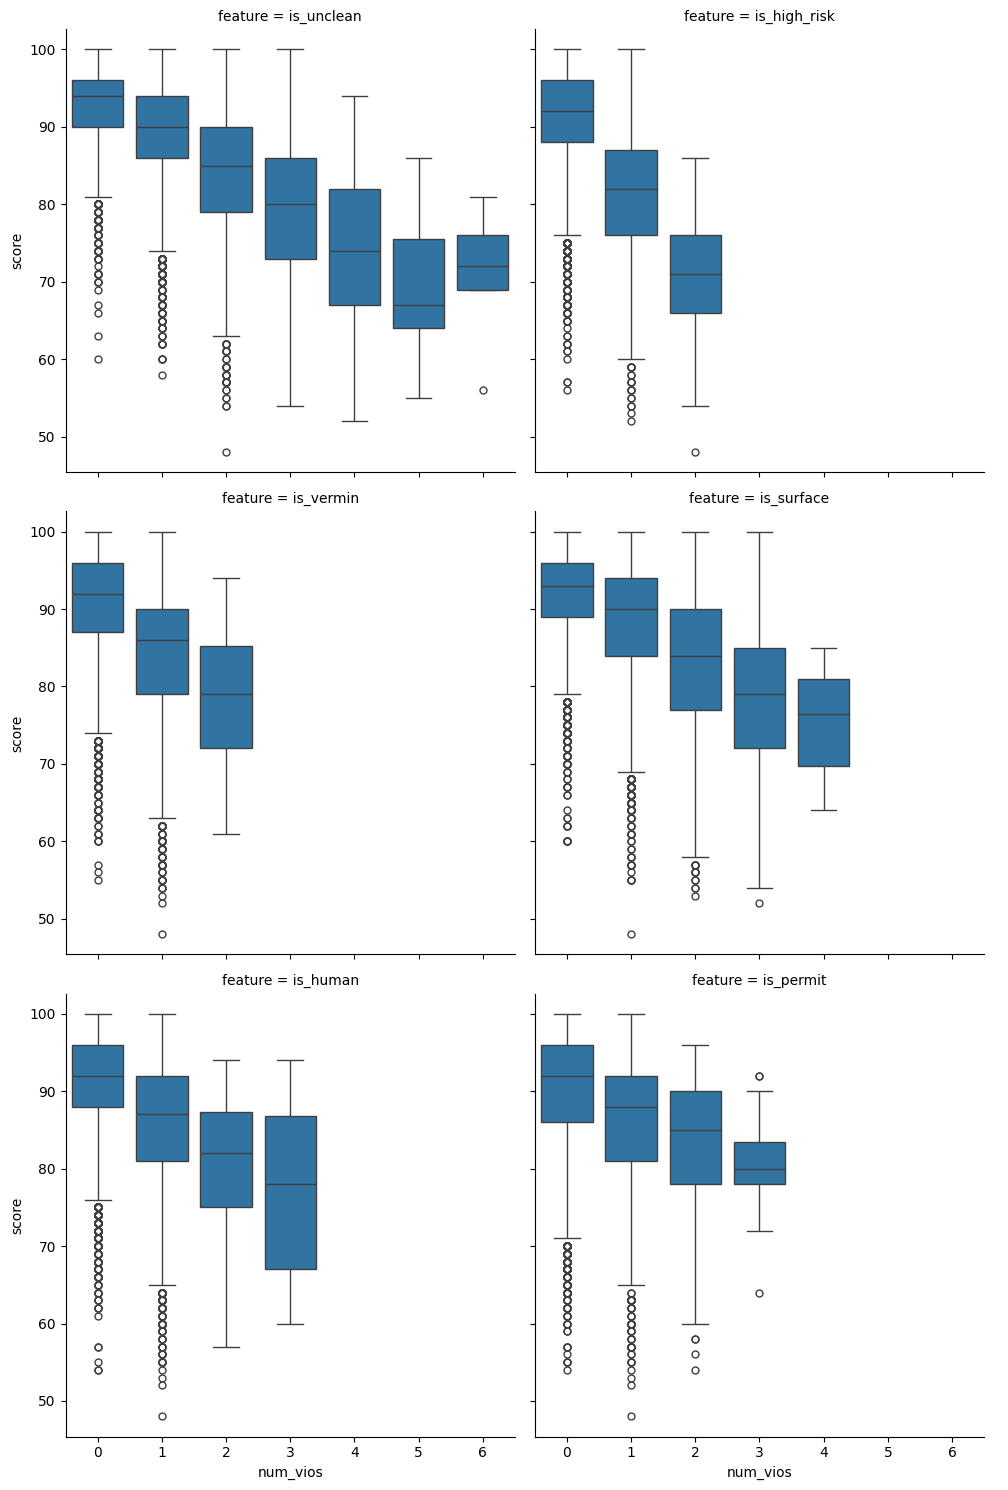

In [34]:
# you will learn this syntax in the next class. Focus on interpreting for now. Use sns.catplot function
import seaborn as sns
sns.catplot(x='num_vios', y='score',
               col='feature', col_wrap=2,
               kind='box',
               data=violation_type_and_scores);

Above we can observe:
* The inspection score generally goes down with increasing numbers of violations, as expected.
* Depending on the violation keyword, inspections scores on average go down at slightly different rates.
* For example, that if a restaurant inspection involved 2 violations with the keyword "vermin", the average score for that inspection would be a little bit below 80.